In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
wine = pd.read_csv(r'C:\Users\Anas\Desktop\Projects for Data Science\wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
wine.shape

(6497, 13)

In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [9]:
wine.duplicated().sum()

1177

In [12]:
wine = wine.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [15]:
count_cat = wine.nunique()
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64

In [16]:
wine["type"].value_counts()

white    3961
red      1359
Name: type, dtype: int64

In [17]:
wine["type"].value_counts("white")*100
wine["type"].value_counts("red")*100

white    74.454887
red      25.545113
Name: type, dtype: float64

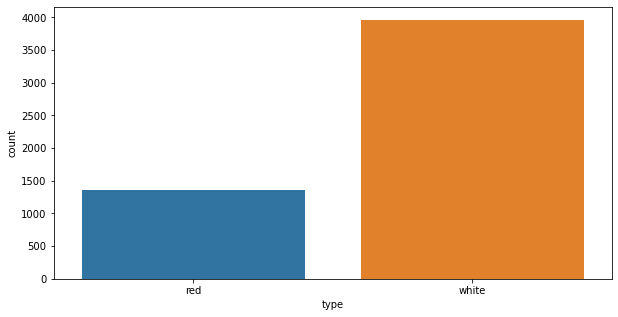

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x = wine['type']);

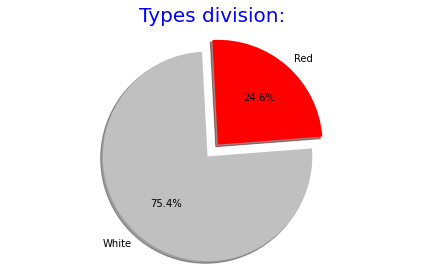

In [22]:
# Pie chart
labels = ['White', 'Red'] # every label represnts a type
pie_x = 0.753886 # the distribution
pie_y = 0.246114 # the distribution
sizes = [pie_x,pie_y] # we have two types and their distribution
explode = (0, 0.15) # the distance between the pic slicers
col_pie = ["silver","red"] # for the colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
# equal aspect ratio ensures that pie is drawn as a circle
plt.title("Types division:", size=20, color="blue")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

C:\Users\Anas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


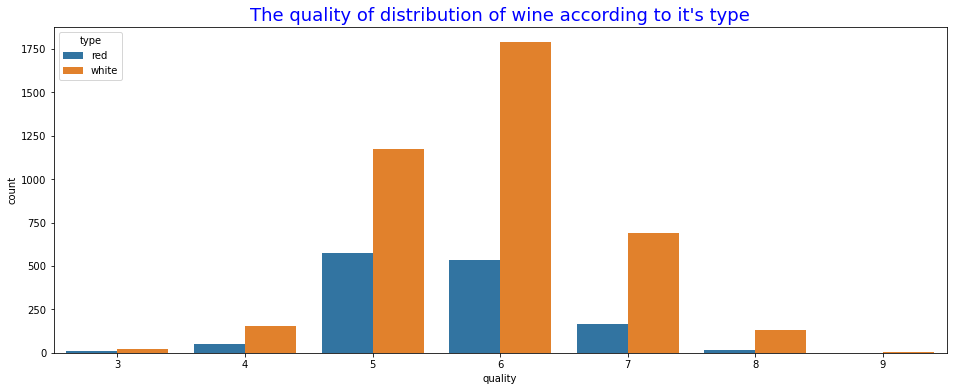

In [23]:
plt.figure(figsize = (16,6))
plt.title("The quality of distribution of wine according to it's type", size=18, color='b')
sns.countplot(wine['quality'], hue = wine['type']);

In [24]:
wine["quality"].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

In [26]:
red_per_quality = wine.loc[wine["type"]=='red']["quality"].value_counts()
white_per_quality = wine.loc[wine["type"]=='white']["quality"].value_counts()

quality_dist = pd.DataFrame({
     'red':red_per_quality, 
     'white' : white_per_quality})
quality_dist.fillna(value = 0, inplace=True)

quality_dist

,red,white
3,10.0,20
4,53.0,153
5,577.0,1175
6,535.0,1788
7,167.0,689
8,17.0,131
9,0.0,5


In [28]:
red_wine = wine.loc[wine["type"]=='red']
red_wine_5 = red_wine.loc[red_wine["quality"]==6]
red_wine_5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,red
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,red
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6,red
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,red
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red


In [29]:
df_types = wine.groupby('type')
df_types

In [30]:
df_types.quality.mean()

type
red      5.623252
white    5.854835
Name: quality, dtype: float64

In [32]:
encoder = LabelEncoder()
wine['type'] = encoder.fit_transform(wine['type'])

<ipython-input-32-4569d4623a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['type'] = encoder.fit_transform(wine['type'])


In [33]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


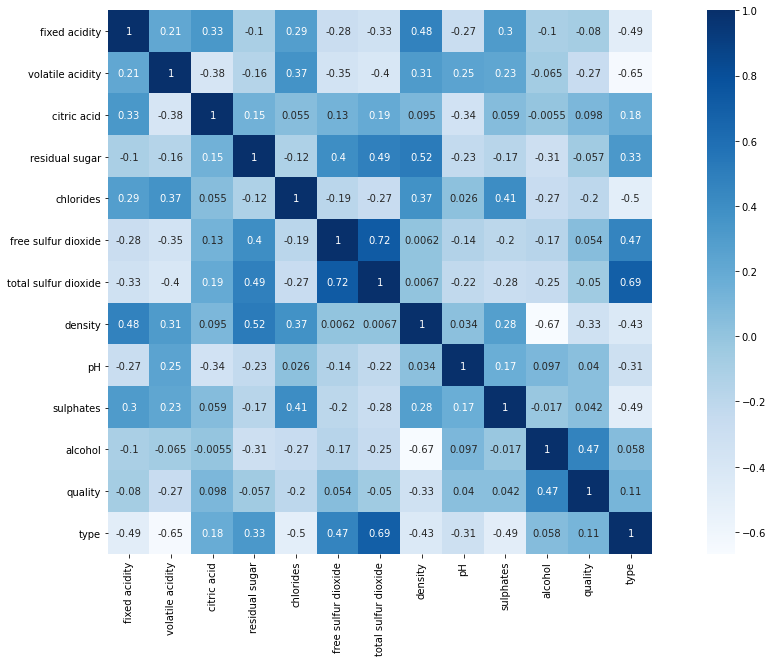

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(wine.corr(), square=True, annot=True, cmap="Blues");

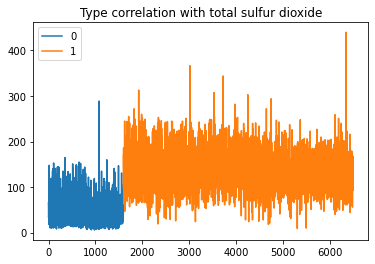

In [36]:
wine.groupby('type')['total sulfur dioxide'].plot(title="Type correlation with total sulfur dioxide", legend=True);


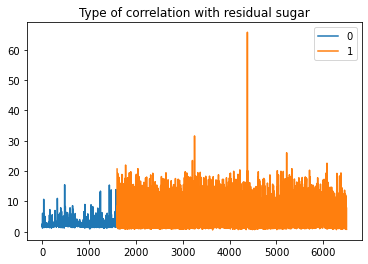

In [37]:
wine.groupby('type')['residual sugar'].plot(title="Type of correlation with residual sugar", legend=True);

In [38]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [41]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wine
df[features] = ss.fit_transform(df[features])
df.head(3)

<ipython-input-41-af99e9ace4b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = ss.fit_transform(df[features])
C:\Users\Anas\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,-0.904497,0
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,-0.904497,0
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,-0.904497,0


In [42]:
target=df['type']
data=df.drop(['type'], axis = 1)
X_train, X_test, Y_train,y_test = train_test_split(data,target,random_state=0)


In [43]:
X_train.shape

(3990, 12)

In [44]:
X_test.shape

(1330, 12)

In [46]:
Y_train.shape

(3990,)

In [47]:
y_test.shape

(1330,)

In [48]:
dm = DummyClassifier(strategy='most_frequent', random_state=0)
dm.fit(X_train, Y_train)
dm

DummyClassifier(random_state=0, strategy='most_frequent')

In [49]:
y_pred = dm.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.75      1.00      0.85       992

    accuracy                           0.75      1330
   macro avg       0.37      0.50      0.43      1330
weighted avg       0.56      0.75      0.64      1330



C:\Users\Anas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'Actual')

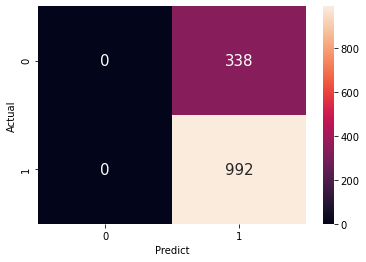

In [53]:
cm_dm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

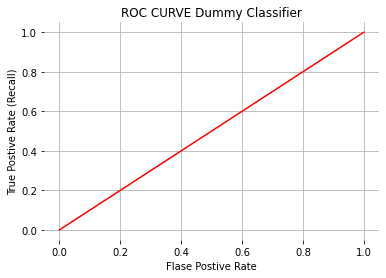

The Score for the ROC Curve is: 50.0%


In [56]:
fpr , tpr, _=roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc"+str(auc), color='r')
plt.box(False)
plt.title('ROC CURVE Dummy Classifier')
plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate (Recall)')
plt.grid(True)
plt.show()

dummy_auc =round(auc, 3)*100

print(f"The Score for the ROC Curve is: {round(auc,3)*100}%")

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(X_test)

In [60]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



In [71]:
k_range = list(range(3,51)) # we will test k values in range 3-50
weight_op = ['uniform', 'distance'] # we will test the knn methods uniform & distance
d = {'n_neighbors' :k_range, 'weights': weight_op}

In [72]:
grid_temp = GridSearchCV(knn, d, cv=10, scoring='accuracy') # we chose model, d(range, methods), num of cv groups and scoring method
grid_temp.fit(data, target)
print("score:",grid_temp.best_score_," params:",grid_temp.best_params_)

score: 0.9930451127819551  params: {'n_neighbors': 6, 'weights': 'distance'}


In [74]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(33.0, 0.5, 'Actual')

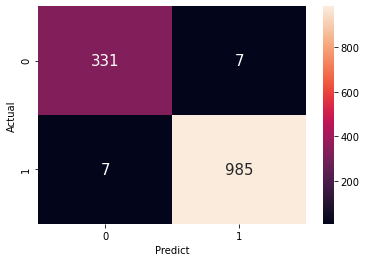

In [77]:
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

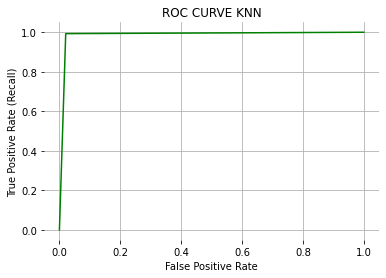

The score for the ROC Curve is: 98.6%


In [78]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='g')
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

knn_auc = round(auc,3)*100

print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

In [80]:
dct = DecisionTreeClassifier(random_state=0) # gini and best are the default
dct = dct.fit(X_train,Y_train)
dct

DecisionTreeClassifier(random_state=0)

In [81]:
y_pred = dct.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.99      0.98      0.99       992

    accuracy                           0.98      1330
   macro avg       0.97      0.98      0.97      1330
weighted avg       0.98      0.98      0.98      1330



In [84]:
path = dct.cost_complexity_pruning_path(X_train,Y_train)
alphas = path.ccp_alphas
impurities = path.impurities
# it returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
alphas

array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
       2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
       3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
       4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
       4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
       7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
       9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
       1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
       1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
       6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
       2.39582664e-01])

In [85]:
d = {'ccp_alpha': alphas}
d

{'ccp_alpha': array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
        2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
        3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
        4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
        4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
        7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
        9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
        1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
        1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
        6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
        2.39582664e-01])}

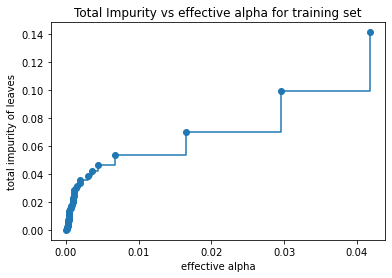

In [86]:
fig, ax = plt.subplots()
ax.plot(alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

In [87]:
grid_dct = GridSearchCV(dct, d, cv=10, scoring='accuracy')
grid_dct.fit(data, target)
print("score:", grid_dct.best_score_, "params:", grid_dct.best_params_)

score: 0.9800751879699249 params: {'ccp_alpha': 0.0004761904761904761}


In [88]:
dct = DecisionTreeClassifier(ccp_alpha = 0.0004761904761904761)
dct = dct.fit(X_train, Y_train)
dct

DecisionTreeClassifier(ccp_alpha=0.0004761904761904761)

In [89]:
y_pred = dct.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [90]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       338
           1       0.99      0.98      0.98       992

    accuracy                           0.98      1330
   macro avg       0.97      0.97      0.97      1330
weighted avg       0.98      0.98      0.98      1330



Text(33.0, 0.5, 'Actual')

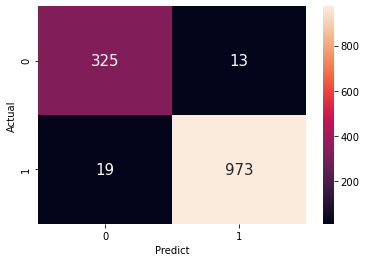

In [91]:
cm_dct = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dct,annot=True,annot_kws={'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

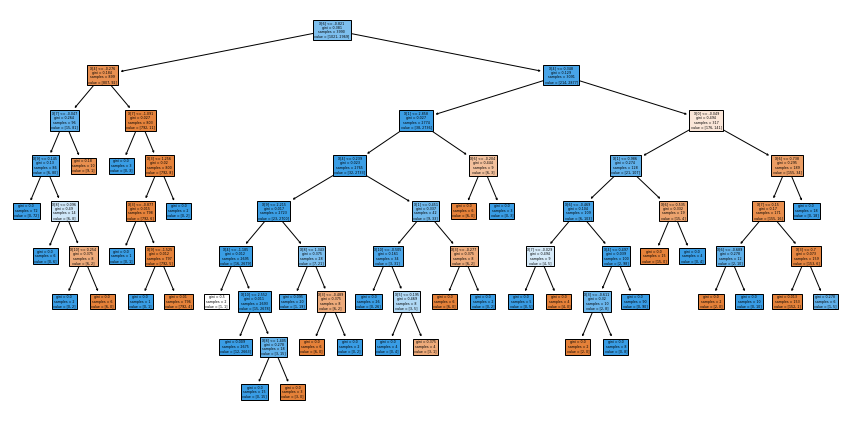

In [92]:
plt.figure(figsize=(15,7.5))
plot_tree(dct,filled=True);

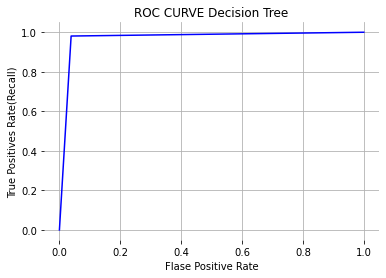

The score for the ROC Curve is : 97.1%


In [93]:
fpr, tpr , _=roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc"+str(auc), color='b')
plt.box(False)
plt.title("ROC CURVE Decision Tree")
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positives Rate(Recall)')
plt.grid(True)
plt.show()

dct_auc = round(auc,3)*100

print(f'The score for the ROC Curve is : {round(auc,3)*100}%')

In [95]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       338
           1       0.99      1.00      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.98      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(33.0, 0.5, 'Actual')

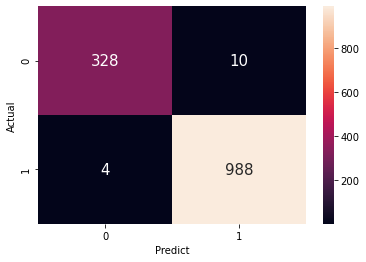

In [100]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True, annot_kws = {'size':15}, fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [102]:
print(metrics.accuracy_score(y_test, predictions))

0.9894736842105263


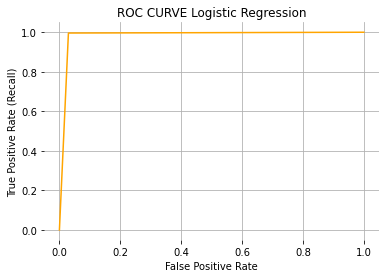

The score for the ROC Curve is: 98.3%


In [104]:
fpr , tpr , _=roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="auc="+str(auc), color='orange')
plt.box(False)
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

lr_auc = round(auc,3)*100

print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

In [105]:
print("The score for the models:\n")
print("Dummy Classifer:      ",dummy_auc,"%")
print("KNN:                  ",knn_auc,"%")
print("Decision Tree:        ",dct_auc,"%")
print("Logistic Regression:  ",lr_auc,"%")

The score for the models:

Dummy Classifer:       50.0 %
KNN:                   98.6 %
Decision Tree:         97.1 %
Logistic Regression:   98.3 %
